In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df_siniestros=pd.read_csv(r"C:\Users\Usuario\Desktop\ProyectosHenry\ProyectoIndividual02\DataSets\siniestros_completos.csv")
df_victimas=pd.read_csv(r"C:\Users\Usuario\Desktop\ProyectosHenry\ProyectoIndividual02\DataSets\siniestros_victimas.csv")

cantidad de accidentes por comuna

In [4]:
df_siniestros.head(3)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [5]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               696 non-null    object
 1   N_VICTIMAS       696 non-null    int64 
 2   FECHA            696 non-null    object
 3   HORA             696 non-null    object
 4   LUGAR_DEL_HECHO  696 non-null    object
 5   TIPO_DE_CALLE    696 non-null    object
 6   COMUNA           696 non-null    int64 
 7   POS X            696 non-null    object
 8   POS Y            696 non-null    object
 9   PARTICIPANTES    696 non-null    object
 10  VICTIMA          696 non-null    object
 11  ACUSADO          696 non-null    object
dtypes: int64(2), object(10)
memory usage: 65.4+ KB


In [22]:
# Lista para almacenar los resultados por columna
resultados = []

# Bucle para recorrer todas las columnas del DataFrame
for columna in df_siniestros.columns:
    # Contar cuántos valores son iguales a "N/D", "ND" o "NO DATA"
    conteo = df_siniestros[columna].isin(['N/D', 'ND', 'NO DATA']).sum()
    
    # Almacenar el resultado en la lista
    resultados.append({'Columna': columna, 'Conteo_ND': conteo})

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar el resultado
resultados_df

,Columna,Conteo_ND
0,ID,0
1,N_VICTIMAS,0
2,FECHA,0
3,HORA,0
4,LUGAR_DEL_HECHO,0
5,TIPO_DE_CALLE,0
6,COMUNA,0
7,POS X,0
8,POS Y,0
9,PARTICIPANTES,0


columna N_Victimas

In [7]:
df_siniestros["N_VICTIMAS"].min()
df_siniestros["N_VICTIMAS"].max()


3

columna fecha

In [8]:
df_siniestros['FECHA'] = pd.to_datetime(df_siniestros['FECHA'])

columna Hora

In [71]:
df_siniestros['HORA'] = df_siniestros['HORA'].fillna(0)
df_siniestros['HORA'] = df_siniestros['HORA'].astype(int)

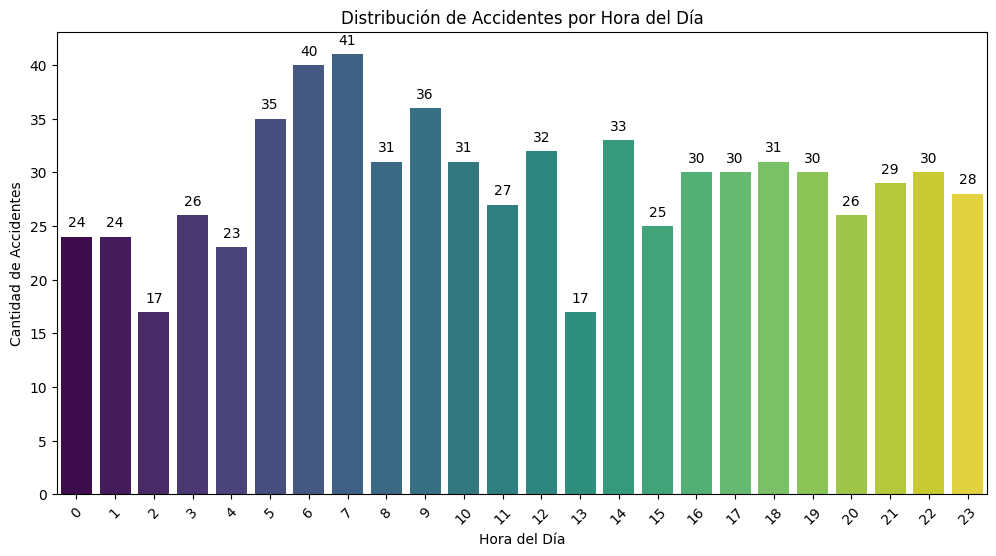

In [72]:
# Graficar la distribución de la columna 'HORA'
plt.figure(figsize=(12, 6))
sns.countplot(x='HORA', data=df_siniestros, hue='HORA', palette='viridis', order=sorted(df_siniestros['HORA'].unique()), legend=False)
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')

# Agregar etiquetas de cantidad en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)  # Ajusta la rotación de las etiquetas en el eje x para mayor legibilidad
plt.show()

columna TIPO_DE_CALLE

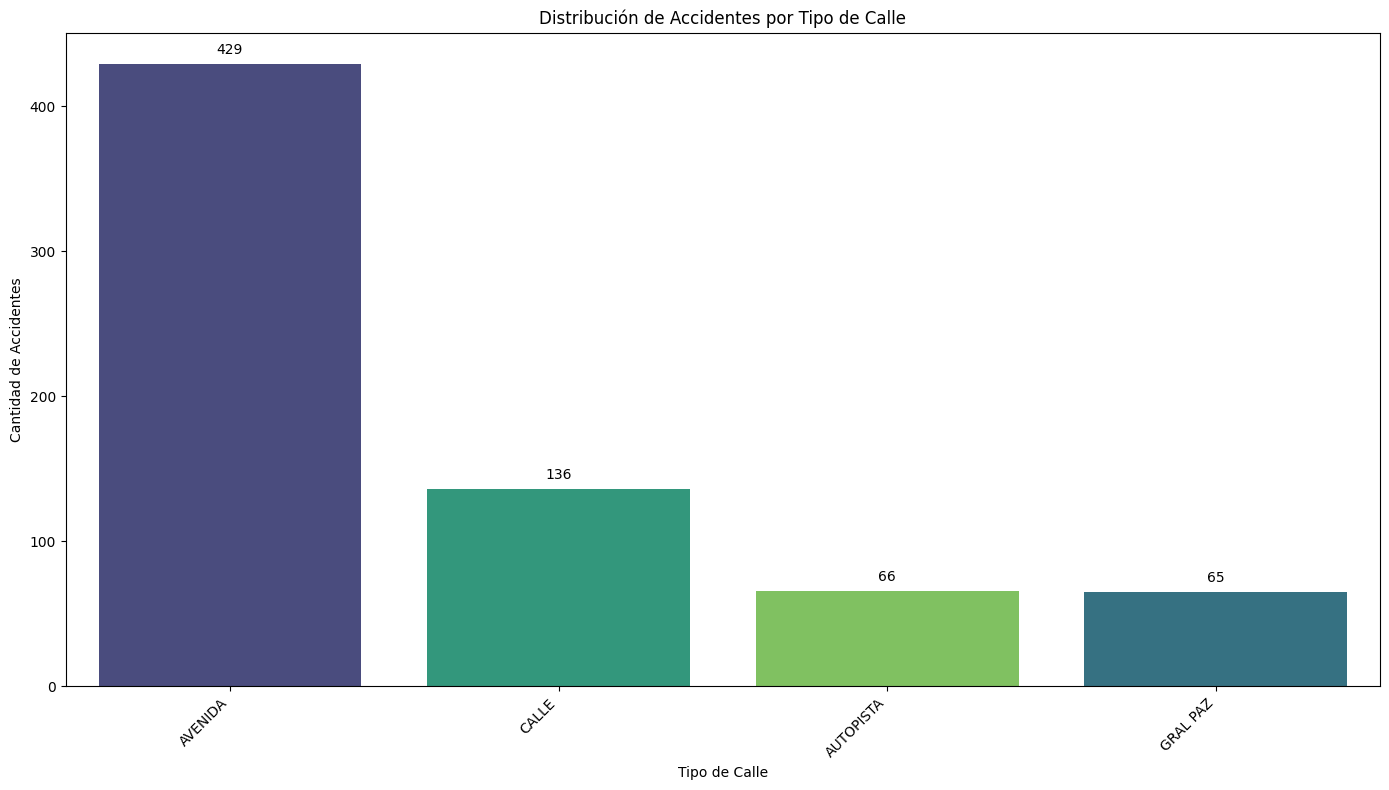

In [23]:

# Graficar la distribución de la columna 'TIPO_DE_CALLE'
plt.figure(figsize=(14, 8))
sns.countplot(x='TIPO_DE_CALLE', data=df_siniestros, hue='TIPO_DE_CALLE', palette='viridis', order=df_siniestros['TIPO_DE_CALLE'].value_counts().index, legend=False)
plt.title('Distribución de Accidentes por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Accidentes')

# Agregar etiquetas de cantidad en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas en el eje x para mayor legibilidad
plt.tight_layout()
plt.show()

columna comuna

In [25]:
df_siniestros["COMUNA"].min()
df_siniestros["COMUNA"].max()

15

columnas pos x pos y

In [27]:
# Convertir datos faltantes en NaN en las columnas POS X y POS Y
df_siniestros[['POS X', 'POS Y']] = df_siniestros[['POS X', 'POS Y']].apply(pd.to_numeric, errors='coerce')

# Convertir las columnas POS X y POS Y a tipo de dato float
df_siniestros[['POS X', 'POS Y']] = df_siniestros[['POS X', 'POS Y']].astype(float)

# Verificar los cambios
print(df_siniestros.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   HORA             695 non-null    float64       
 4   LUGAR_DEL_HECHO  696 non-null    object        
 5   TIPO_DE_CALLE    696 non-null    object        
 6   COMUNA           696 non-null    int64         
 7   POS X            684 non-null    float64       
 8   POS Y            684 non-null    float64       
 9   PARTICIPANTES    696 non-null    object        
 10  VICTIMA          696 non-null    object        
 11  ACUSADO          696 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 65.4+ KB
None


COLUMNAS VICTIMA Y ACUSADO

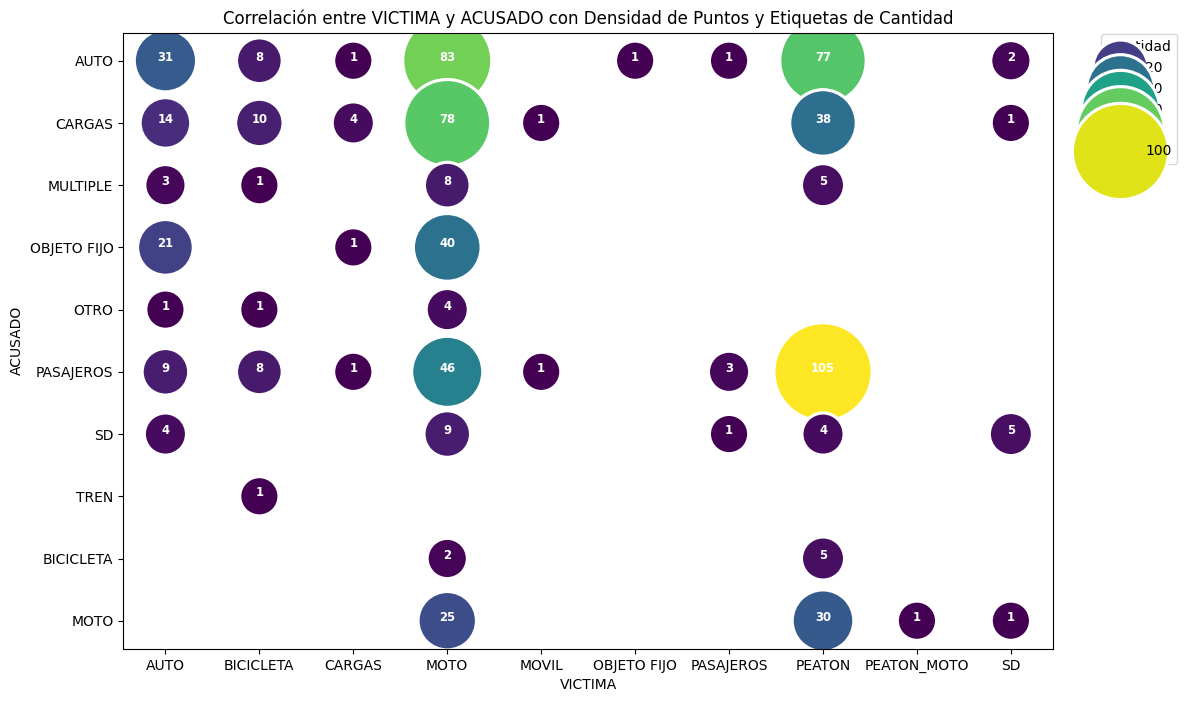

In [69]:
# Contar la cantidad de cada combinación de 'VICTIMA' y 'ACUSADO'
counts = df_siniestros.groupby(['VICTIMA', 'ACUSADO']).size().reset_index(name='Cantidad')

# Graficar la correlación entre las columnas 'VICTIMA' y 'ACUSADO' con densidad de puntos y etiquetas de cantidad
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='VICTIMA', y='ACUSADO', data=counts, hue='Cantidad', size='Cantidad', sizes=(800, 5000), palette='viridis')

# Agregar etiquetas de cantidad en cada punto
for line in range(0, counts.shape[0]):
     scatter_plot.text(counts['VICTIMA'].iloc[line], counts['ACUSADO'].iloc[line], 
                       counts['Cantidad'].iloc[line], horizontalalignment='center', 
                       size='small', color='white', weight='semibold')

plt.title('Correlación entre VICTIMA y ACUSADO con Densidad de Puntos y Etiquetas de Cantidad')
plt.xlabel('VICTIMA')
plt.ylabel('ACUSADO')
plt.legend(title='Cantidad', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
plt.show()

guardado datasets para consumo

In [109]:
df_siniestros.to_csv("df_siniestros_consumo.csv", index=False)

***********************************************************************************************************

df_victimas

In [93]:
df_victimas.head(3)

,ID_hecho,FECHA,VICTIMA,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,MOTO,19,2016-01-01
1,2016-0002,2016-01-02,AUTO,70,2016-01-02
2,2016-0003,2016-01-03,MOTO,30,2016-01-03


In [94]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             649 non-null    object
 1   FECHA                649 non-null    object
 2   VICTIMA              649 non-null    object
 3   EDAD                 649 non-null    object
 4   FECHA_FALLECIMIENTO  649 non-null    object
dtypes: object(5)
memory usage: 25.5+ KB


busqueda y conteo de valores

In [95]:
# Lista para almacenar los resultados por columna
resultados = []

# Bucle para recorrer todas las columnas del DataFrame
for columna in df_victimas.columns:
    # Contar cuántos valores son iguales a "N/D", "ND" o "NO DATA"
    conteo = df_victimas[columna].isin(['N/D', 'ND', 'NO DATA']).sum()
    
    # Almacenar el resultado en la lista
    resultados.append({'Columna': columna, 'Conteo_ND': conteo})

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar el resultado
resultados_df

,Columna,Conteo_ND
0,ID_hecho,0
1,FECHA,0
2,VICTIMA,0
3,EDAD,0
4,FECHA_FALLECIMIENTO,0


In [96]:
# Contar la cantidad de valores nulos por columna
nulos_por_columna = df_victimas.isnull().sum()

# Mostrar la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
ID_hecho               0
FECHA                  0
VICTIMA                0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64


In [14]:
df_victimas.rename(columns={"ID_hecho":"ID"}, inplace=True)

columna fecha

In [15]:
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

columna VICTIMA

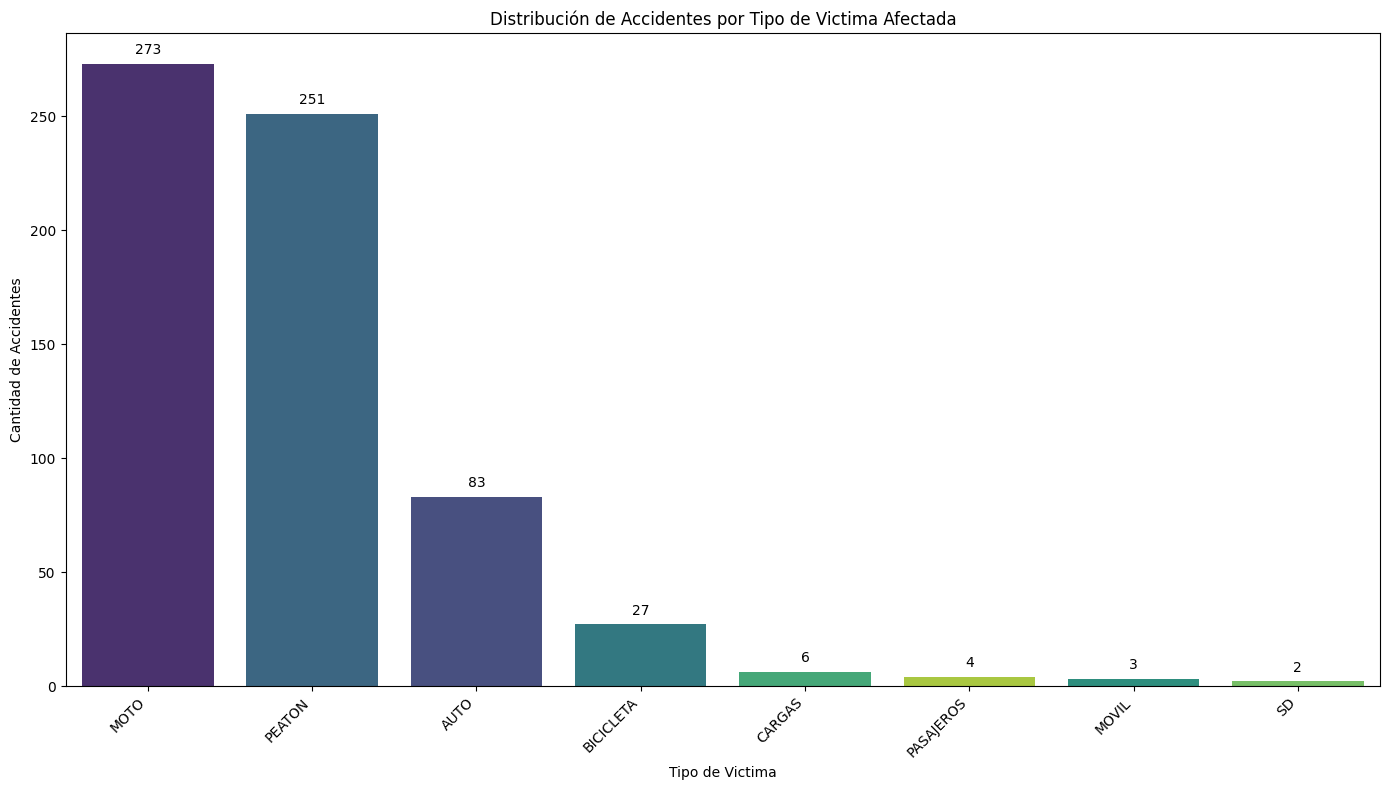

In [99]:

plt.figure(figsize=(14, 8))
sns.countplot(x='VICTIMA', data=df_victimas, hue='VICTIMA', palette='viridis', order=df_victimas['VICTIMA'].value_counts().index, legend=False)
plt.title('Distribución de Accidentes por Tipo de Victima Afectada')
plt.xlabel('Tipo de Victima')
plt.ylabel('Cantidad de Accidentes')

# Agregar etiquetas de cantidad en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas en el eje x para mayor legibilidad
plt.tight_layout()
plt.show()

columna EDAD

In [16]:
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

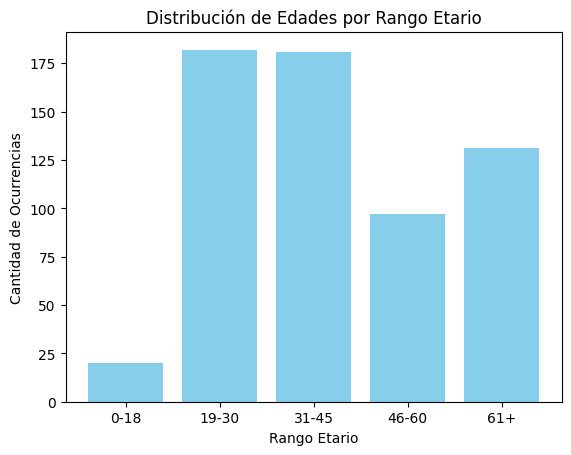

In [17]:
# Crear rangos etarios
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Agregar una columna de rangos etarios al DataFrame
df_victimas['RANGO_ETARIO'] = pd.cut(df_victimas['EDAD'], bins=bins, labels=labels, right=False)

# Contar la cantidad de ocurrencias en cada rango etario
conteo_por_rango_etario = df_victimas['RANGO_ETARIO'].value_counts().sort_index()

# Graficar un gráfico de barras
plt.bar(conteo_por_rango_etario.index, conteo_por_rango_etario.values, color='skyblue')
plt.title('Distribución de Edades por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.show()

columna Fecha_FALLECIMIENTO

In [18]:
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'])

guardado dataset final para consumo

In [19]:
df_victimas.to_csv("df_victimas_consumo.csv", index=False)

In [20]:
import pandas as pd
df_siniestros=pd.read_csv(r"C:\Users\Usuario\Desktop\ProyectosHenry\ProyectoIndividual02\df_siniestros_consumo.csv")
df_victimas=pd.read_csv(r"C:\Users\Usuario\Desktop\ProyectosHenry\ProyectoIndividual02\df_victimas_consumo.csv", encoding="utf-8")

In [21]:
df_final=pd.merge(df_siniestros,df_victimas, on="ID")

In [23]:
df_final.drop(columns=["FECHA_y", "VICTIMA_y"], inplace=True)
df_final.head(3)

,ID,N_VICTIMAS,FECHA_x,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,POS X,POS Y,PARTICIPANTES,VICTIMA_x,ACUSADO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,1,2016-01-01,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,19.0,2016-01-01,19-30
1,2016-0002,1,2016-01-02,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,70.0,2016-01-02,61+
2,2016-0003,1,2016-01-03,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,30.0,2016-01-03,31-45


In [24]:
df_final.to_csv("df_final_consumo.csv", index=False)